Basic Python in Colab



In [1]:
print("Hello World!")

Hello World!


In [2]:
x=5+3
print(x)

8


Installing Tensorflow in Colab

In [3]:
!pip install tensorflow

In [4]:
import tensorflow as tf

scaler_tensor=tf.constant(5)
print(scaler_tensor)

tf.Tensor(5, shape=(), dtype=int32)


In [5]:
vector_tensor=tf.constant(1,2,3)
print(vector_tensor)

tf.Tensor([1. 1. 1.], shape=(3,), dtype=float64)


In [6]:
matrix_tensor=tf.constant([[1,2],[3,4]])
print(matrix_tensor)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


Tensor Operations

In [7]:
tensor1=tf.constant([[1,2],[3,4]])
tensor2=tf.constant([[5,6],[7,8]])

In [8]:
addition_result=tf.add(tensor1,tensor2)
print(addition_result)

tf.Tensor(
[[ 6  8]
 [10 12]], shape=(2, 2), dtype=int32)


In [9]:
import tensorflow as tf

w = tf.Variable(2.0)
b = tf.Variable(1.0)

def linear_model(x):
    return w * x + b

def loss(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))

x_data = tf.constant([1.0, 2.0, 3.0, 4.0])
y_data = tf.constant([2.0, 4.0, 6.0, 8.0])

learning_rate = 0.1

with tf.GradientTape() as tape:
    predictions = linear_model(x_data)
    current_loss = loss(predictions, y_data)

gradients = tape.gradient(current_loss, [w, b])

w.assign_sub(learning_rate * gradients[0])
b.assign_sub(learning_rate * gradients[1])

print(w.numpy(), b.numpy())

1.5 0.8


Visualizing the result

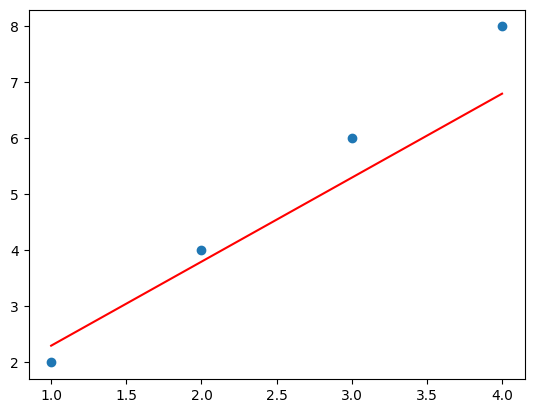

In [10]:
import matplotlib.pyplot as plt

final_predictions = linear_model(x_data)

plt.scatter(x_data, y_data)
plt.plot(x_data, final_predictions, color='red')
plt.show()

Building a simple neural network

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
import numpy as np

x_data = np.array(x_data)
y_data = np.array(y_data)

model.compile(optimizer='adam', loss='mse')
model.fit(x_data, y_data, epochs=200)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 35.8651
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 35.7311
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 35.5975
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 35.4642
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 35.3313
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 35.1988
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 35.0666
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 34.9348
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 34.8033
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 34.6723
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 34.5416
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 34.4113
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 34.2813
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 34.1518
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 34.0226
Epoch 

Mounting Google Drive

In [14]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
image_path = '/content/drive/My Drive/IJSE-ML/Day 8/dog.jpg'

# Load CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 47ms/step - accuracy: 0.3410 - loss: 1.7710 - val_accuracy: 0.5559 - val_loss: 1.2461
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.5732 - loss: 1.1956 - val_accuracy: 0.6254 - val_loss: 1.0584
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 52ms/step - accuracy: 0.6442 - loss: 1.0126 - val_accuracy: 0.6678 - val_loss: 0.9560
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.6860 - loss: 0.9009 - val_accuracy: 0.6804 - val_loss: 0.9255
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.7094 - loss: 0.8274 - val_accuracy: 0.6991 - val_loss: 0.8653
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7324 - loss: 0.7647 - val_accuracy: 0.6836 - val_loss: 0.9068
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.7550 - loss: 0.7010 - val_accuracy: 0.6977 - val_loss: 0.8976
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.7664 -

In [21]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7020 - loss: 0.8880
Test Loss: 0.9117333889007568, Test Accuracy: 0.698199987411499


In [28]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

img_path = '/content/drive/My Drive/IJSE-ML/Day 8/dog.jpg'
img_array = preprocess_image(img_path)
predictions = model.predict(img_array)
print(f'Predicted class: {np.argmax(predictions[0])}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted class: 0


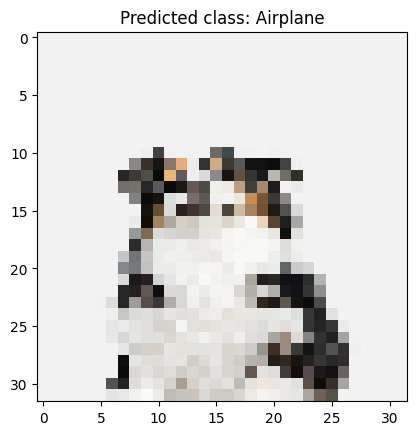

In [29]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
predicted_class = np.argmax(predictions[0])
predicted_class_name = class_names[predicted_class]

# Display the image and prediction
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.title(f'Predicted class: {predicted_class_name}')
plt.show()

Task: Create animal clasification using animals10 dataset

Step 1: Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Step 2: Install and Import Libraries

In [ ]:
!pip install kagglehub
import kagglehub
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Step 3: Download the Animals-10 Dataset

In [ ]:
path = kagglehub.dataset_download("alessiocorrado99/animals10")
print("Path to dataset files:", path)

Step 4: Define Paths and Organize Data

In [ ]:
dataset_path = os.path.join(path, "raw-img")
IMG_SIZE = (64, 64)
BATCH_SIZE = 32

Step 5: Create Data Generators for Training and Testing

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation'
)

Step 6: Build the CNN Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Step 7: Compile the Model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Step 8: Train the Model

In [ ]:
model.fit(train_generator, validation_data=val_generator, epochs=10)

Step 9: Evaluate the *Model*

In [ ]:
test_loss, test_acc = model.evaluate(val_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

Step 10: Make Predictions on a Custom Image

In [ ]:
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

img_path = "/content/drive/My Drive/IJSE-ML/Day 8/dog2.jpg"
img_array = preprocess_image(img_path)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

class_names = list(train_generator.class_indices.keys())
predicted_class_name = class_names[predicted_class]

Step 11: Display the Image and Prediction

In [ ]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f'Predicted class: {predicted_class_name}')
plt.axis('off')
plt.show()